In [ ]:
! pip install seaborn
#original github of 16S and Shotgun https://github.com/wbb121/IBD-data-analysis
!pip install umap-learn
#!pip3 install umap-learn
#! pip3 install numpy==1.23.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=6b5045a0c044afbb6fe103d8a6e6f226c4aaa4bbd4caa01c50fe7a925475dd31
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=b9c819c6d07ef43893bb561bf47c346010e1a8844d6c9e91eea3c25953fedf04
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-lear

In [ ]:
import requests
import os
import urllib.request
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
import time
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import umap

In [ ]:
def count_zero_rate(df):
    """Calculates the percentage of zeros in a pandas DataFrame."""
    total_cells = df.size
    zero_cells = (df == 0).sum().sum()
    zero_rate = zero_cells / total_cells
    return zero_rate

def run_pca(data,n_components=30,random_state =1):
    today= time.ctime()


    pca = PCA(n_components=n_components, random_state=random_state)
    pca_data= pca.fit_transform(data)
    print('process start',today)
    return pca_data


def run_umap(pca_data, n_neighbors=15, n_components=2, metric='euclidean', metric_kwds=None,
             output_metric='euclidean', output_metric_kwds=None, n_epochs=None, learning_rate=1.0,
             init='spectral', min_dist=0.1, spread=1.0, low_memory=True, n_jobs=-1, set_op_mix_ratio=1.0,
             local_connectivity=1.0, repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0,
             a=None, b=None, random_state=None, angular_rp_forest=False, target_n_neighbors=-1,
             target_metric='categorical', target_metric_kwds=None, target_weight=0.5, transform_seed=42,
             transform_mode='embedding', force_approximation_algorithm=False, verbose=False,
             unique=False, densmap=False, dens_lambda=2.0, dens_frac=0.3, dens_var_shift=0.1,
             output_dens=False, disconnection_distance=None):

    fit = umap.UMAP(n_neighbors, n_components, metric, metric_kwds,
             output_metric, output_metric_kwds, n_epochs, learning_rate,
             init, min_dist, spread, low_memory, n_jobs, set_op_mix_ratio,
             local_connectivity, repulsion_strength, negative_sample_rate, transform_queue_size,
             a, b, random_state, angular_rp_forest, target_n_neighbors,
             target_metric, target_metric_kwds, target_weight, transform_seed,
             transform_mode, force_approximation_algorithm, verbose,
             unique, densmap, dens_lambda, dens_frac, dens_var_shift,
             output_dens, disconnection_distance)
    dim_reduction = fit.fit_transform(pca_data,y=None)

    return dim_reduction


def mb_PHENIX(data, umap_data,t=10,decay=15,metric='euclidean',knn=10):



    print('calculando distancias')

    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix

    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))

    knn_dst = np.sort(distance_matrix, axis=1)


    epsilon = knn_dst[:,knn]


    pdx_scale = (distance_matrix / epsilon).T

    E = np.exp(-1 * ( pdx_scale ** decay))

    print(' afinity matrix done')

    A = (E + E.T)

    diff_deg = np.diag(np.sum(A,0))


    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)


    new_matrix =  np.linalg.matrix_power(diff_op, t)


    data_new = np.array(np.dot(new_matrix,data))

    print('imputation')

    Matix_col_genes_row_cell2 = (data +1) - data

    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2

    Matix_impu = Matix_col_genes_row_cell2 + data_new


    mb_PHENIX = Matix_impu

    print('done')
    end= time.ctime()
    print('done',end)


    return (mb_PHENIX)


def calcular_tasa_ceros(dataframe):
    total_elementos = dataframe.size  # Calculamos el total de elementos en el DataFrame
    cantidad_ceros = (dataframe == 0).sum().sum()  # Contamos la cantidad de ceros en el DataFrame

    tasa_ceros = (cantidad_ceros / total_elementos) * 100

    return tasa_ceros


In [ ]:
url_genus_table_16S = 'https://raw.githubusercontent.com/wbb121/IBD-data-analysis/main/amplicon_tables/genus_table_rarefaction_100k.csv'

url_genus_table_shotgun = 'https://raw.githubusercontent.com/wbb121/IBD-data-analysis/main/shotgun_tables/shotgun_abundance_L6.txt'

metadata= 'https://raw.githubusercontent.com/wbb121/IBD-data-analysis/main/metadata.csv'

In [ ]:
urllib.request.urlretrieve(url_genus_table_16S, 'table_16S.csv')
urllib.request.urlretrieve(url_genus_table_shotgun, 'table_shotgun.csv')
urllib.request.urlretrieve(metadata, 'metadata.csv')
os.listdir()
#!cd /content

['.config',
 'metadata.csv',
 'table_16S.csv',
 'table_shotgun.csv',
 'sample_data']

In [ ]:
metadata = pd.read_csv('/content/metadata.csv');metadata= metadata.iloc[:,1:]
table_16S = pd.read_csv('/content/table_16S.csv').set_index('Unnamed: 0').T
table_shotgun = pd.read_csv('/content/table_shotgun.csv',skiprows=1,sep='\t').T

#shared from the same sample based on the metadata among 16S and and shotgun
table_16S=table_16S.reset_index()
table_16S_ok= table_16S[table_16S['index'].isin(metadata['SampleID'])]
table_16S_ok.columns = table_16S_ok.columns.to_series().apply(lambda x: x.split(';')[5] if len(x.split(';')) > 4 else x)
table_16S_ok= table_16S_ok.set_index('index')

table_shotgun=table_shotgun.reset_index()
table_shotgun['index'] = table_shotgun['index'].str.replace('-', '.')
table_shotgun_ok= table_shotgun[table_shotgun['index'].isin(metadata['shotgun.SampleID'])]#['shotgun.SampleID'])]
table_shotgun_ok.columns = table_shotgun_ok.columns.to_series().apply(lambda x: x.split(';')[-1])
table_shotgun_ok = table_shotgun_ok.set_index('index')

#keep bouth matrices with the same id
table_16S_ok['index']= metadata.set_index('SampleID')['shotgun.SampleID']
table_16S_ok=table_16S_ok.set_index('index')

In [ ]:

labels= pd.DataFrame()
labels['SampleType'] = metadata.set_index('shotgun.SampleID')['SampleType']

In [ ]:
#metadata.head()

In [ ]:
# This is the original table from the shotgun data
#table_shotgun_ok.head()

In [ ]:
# Borramos aquellas bacterias que suman cero por muestra.
col_sums = table_shotgun_ok.sum(axis=0)
table_shotgun_ok = table_shotgun_ok.loc[:, col_sums != 0]


In [ ]:
table_shotgun_ok.shape

(42, 454)

In [ ]:
calcular_tasa_ceros(table_shotgun_ok)

78.80742605412209

Haviendo definido el dataframe a analizar, entonces procedemos aqui:bold text

In [ ]:
# REVISAR
# por_drop = 0.1 Y seed=42 están ya definidos?
#mi generador de dropouts con semilla
#def matrix_dropout (df, por_drop = 0.1,seed=42):
def matrix_dropout (df, por_drop ,seed):
  if por_drop <1:
    shape= df.shape[0]*df.shape[1]
    zeros= shape*por_drop
    ones=  shape*( 1-por_drop)
    random_1 = np.array([])
    random_0 = np.array([])
    zeros = round(zeros)
    ones = round(ones)
    random_0 = np.zeros(zeros)
    random_1 = np.ones(ones)

    random_dropout = np.append(random_0,random_1)
    random_dropout = np.random.RandomState(seed=seed).permutation(random_dropout) # we use a permutation
    random_dropout = random_dropout.reshape(df.shape)

    noise_data = df / random_dropout
    noise_data  = noise_data.replace([np.inf, -np.inf], np.nan)

    noise_data = noise_data.replace(np.nan, 0)
    noise_data
    return noise_data
  else:
    print('must be a porcentance a number less than 1 and more than 0')

In [ ]:
# Probar con menores de 95, aleatorio
# 0.05 por drop funciona
# .50 drop funciona
# 0.80 drop lo dejo asi
matrix_dropouted = matrix_dropout(table_shotgun_ok, por_drop = .8,seed=45)

In [ ]:
calcular_tasa_ceros(matrix_dropouted)

95.76777847702958

In [ ]:
matrix_dropouted.head()

,g__Acidobacterium,g__Candidatus Koribacter,g__Acidimicrobium,g__Actinomyces,g__Actinotignum,g__Mobiluncus,g__Schaalia,g__Trueperella,g__Actinopolyspora,g__Bifidobacterium,...,g__Acholeplasma,g__Candidatus Phytoplasma,g__Entomoplasma,g__Mesoplasma,g__Spiroplasma,g__Mycoplasma,g__Thermotoga,g__NA,g__Opitutus,g__Akkermansia
index,,,,,,,,,,,,,,,,,,,,,
SM030818.1,0.0,0.0,0.0,0.000036,0.0,0.0,0.0,0.0,0.0,0.133664,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
SM030818.24,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
SM030818.33,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001678
SM030818.92,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,3.129999e-46,0.0,0.0,0.0,0.0,0.000046,0.0,0.0,0.0,0.000000
SM030818.97,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


<Axes: >

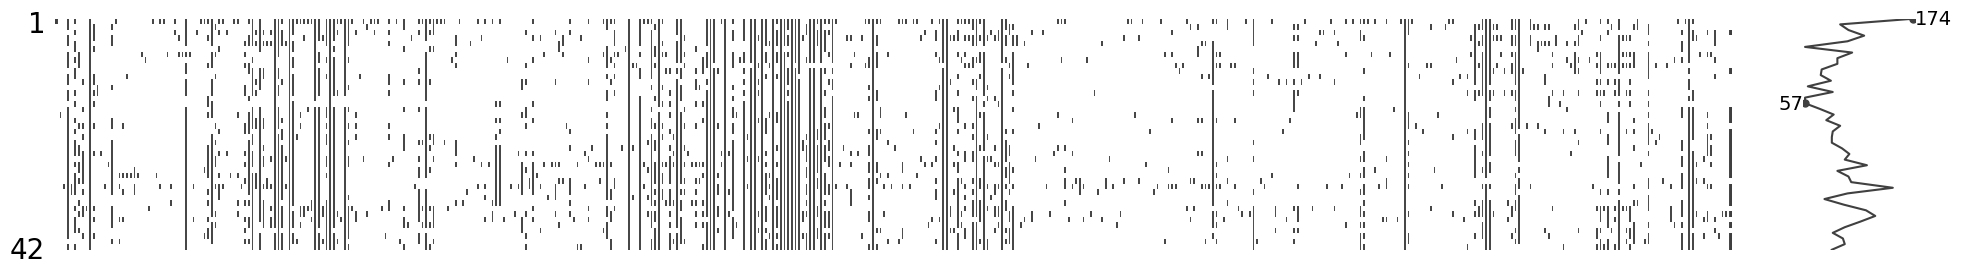

In [ ]:
  #Matriz original
  import missingno as msno
  msno.matrix(table_shotgun_ok.replace(0,np.nan),figsize=(24, 3))

<Axes: >

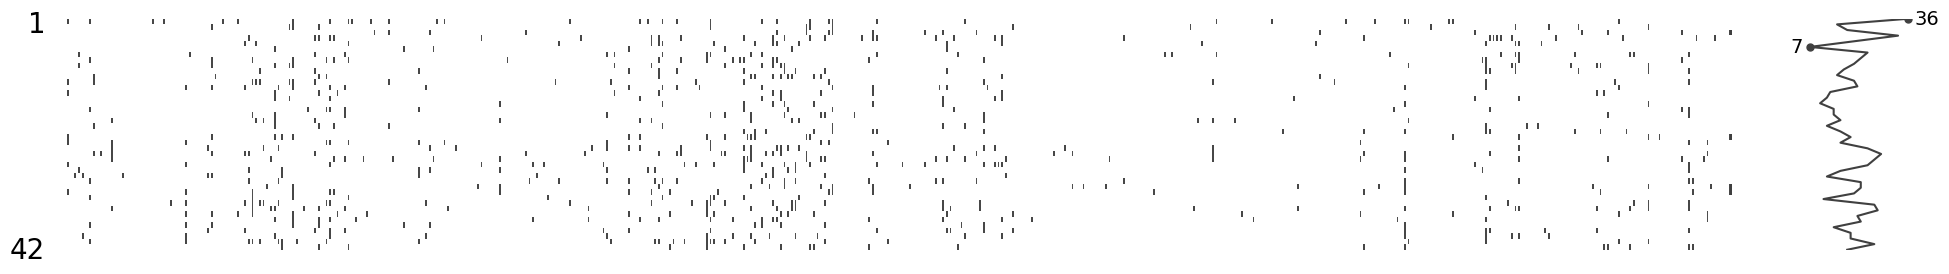

In [ ]:
#Matriz con ceros
import missingno as msno
msno.matrix(matrix_dropouted.replace(0,np.nan),figsize=(24, 3))

In [ ]:
## Imputation
umap_op = umap.UMAP(n_components=10, verbose=True,metric='euclidean',n_epochs=500,min_dist=0.1,
                    n_neighbors=30,random_state=1,target_weight=0.5)
data_umap_vis_super = umap_op.fit_transform(matrix_dropouted,labels['SampleType'].replace( {'Healthy': 0, 'UC':1}))
# regresar t a 2, unicamente utilizar 1 si con los datos artificiales
imputed_ALL =mb_PHENIX(matrix_dropouted, data_umap_vis_super, t=2,decay=500,metric='euclidean',knn=10)


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=1, verbose=True)
Thu Jun 15 18:13:15 2023 Construct fuzzy simplicial set
Thu Jun 15 18:13:15 2023 Finding Nearest Neighbors
Thu Jun 15 18:13:15 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:13:15 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:13:18 2023 Finished embedding
calculando distancias
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Thu Jun 15 18:13:18 2023


<ipython-input-3-88e3e7185b8d>:72: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))


<Axes: >

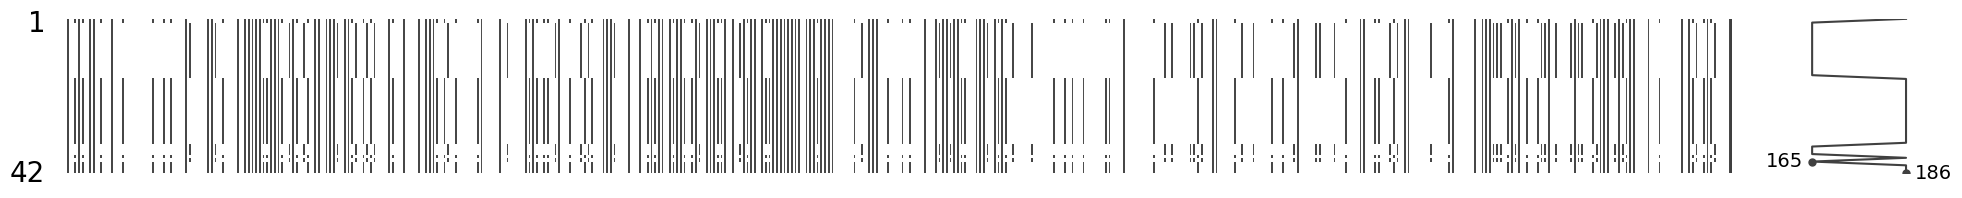

In [ ]:
#imputed_ALL.head()
msno.matrix(imputed_ALL.replace(0,np.nan),figsize=(24, 2))

In [ ]:
calcular_tasa_ceros(imputed_ALL)

61.12334801762115

In [ ]:
##Incluimos un umbral para definir los ceros en imputed_ALL_filter
imputed_ALL_filter= imputed_ALL
# use apply to apply qcut to each column and create a new DataFrame with quintile labels
# Load your data into a DataFrame, e.g. df

# Calculate the threshold value for each column
#thresholds = imputed_ALL_filter.quantile(q=0.1, axis=0)
# thresholds = .000001 and .000005 for 0.5 zero imputation
# thresholds = .0000005 Select this one for 0.8
thresholds = 5e-7
# Replace the values that are below the threshold with 0
imputed_ALL_filter[imputed_ALL_filter < thresholds ] = 0

In [ ]:
calcular_tasa_ceros(imputed_ALL_filter)

78.87560310467799

<Axes: >

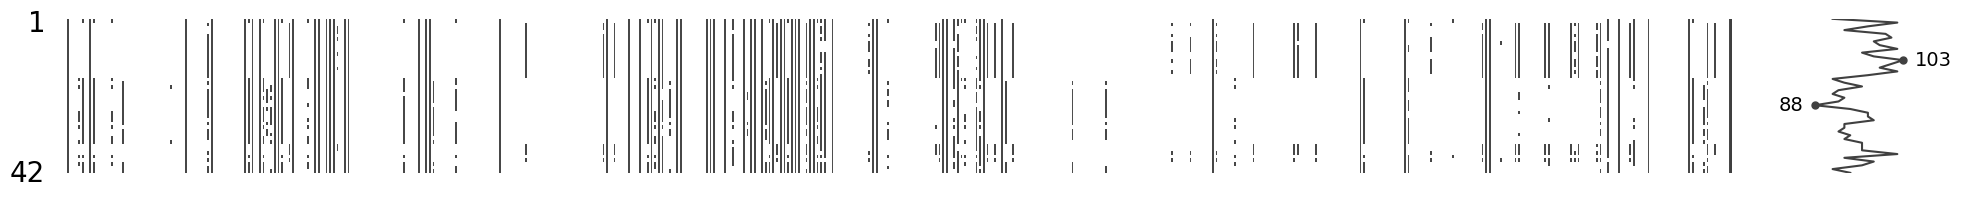

In [ ]:
#graficar los imputados
import missingno as msno
msno.matrix(imputed_ALL.replace(0,np.nan),figsize=(24, 2))

In [ ]:

imputed_ALL.iloc[:,3]

index
SM030818.1      0.000008
SM030818.24     0.000007
SM030818.33     0.000010
SM030818.92     0.000011
SM030818.97     0.000005
SM030818.99     0.000010
SM030818.100    0.000004
SM030818.101    0.000004
SM030818.102    0.000005
SM030818.104    0.000010
SM030818.105    0.000009
SM030818.106    0.000007
SM030818.107    0.000006
SM030818.110    0.000011
SM030818.121    0.000006
SM030818.128    0.000010
SM030818.130    0.000007
SM030818.131    0.000015
SM030818.132    0.000009
SM030818.133    0.000015
SM030818.134    0.000018
SM030818.135    0.000017
SM030818.136    0.000015
SM030818.138    0.000013
SM030818.139    0.000017
SM030818.140    0.000015
SM030818.141    0.000019
SM030818.142    0.000013
SM030818.143    0.000017
SM030818.144    0.000009
SM030818.145    0.000017
SM030818.146    0.000017
SM030818.147    0.000011
SM030818.148    0.000010
SM111418.12     0.000010
SM111418.44     0.000010
SM111418.59     0.000007
SM111418.113    0.000007
SM071219.66     0.000004
SM071219.89     0.0

<Axes: >

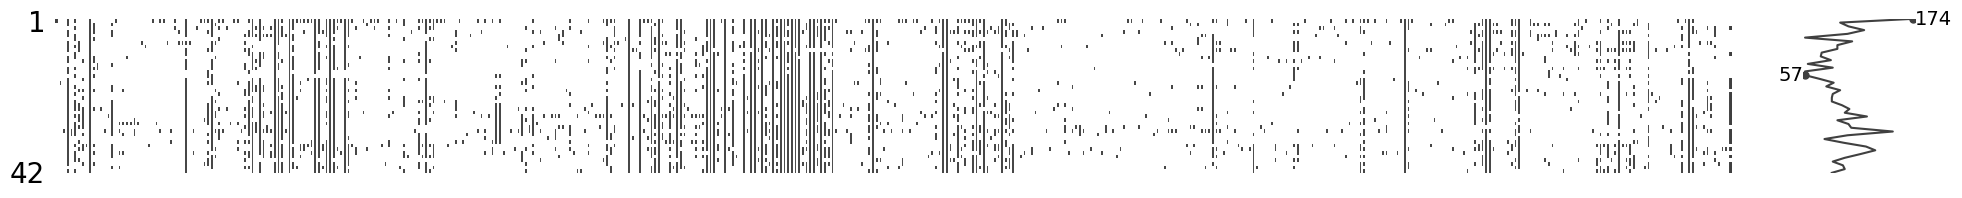

In [ ]:
#Matriz original
import missingno as msno
msno.matrix(table_shotgun_ok.replace(0,np.nan),figsize=(24, 2))

<Axes: >

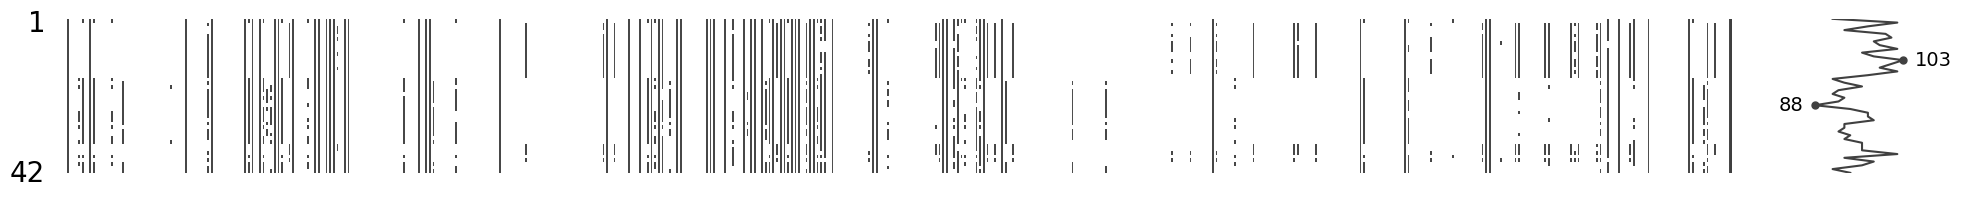

In [ ]:
# Visualizar los imputados con filtro
msno.matrix(imputed_ALL_filter.replace(0,np.nan),figsize=(24, 2))

In [ ]:
# LA MATRIX ORIGINAL ESTA LLENA DE CEROS!!! HAY QUE PASARLO AL INICIO DEL ANALISIS
df = pd.DataFrame()
df['mean_genus'] =table_shotgun_ok.mean()
df['zeros_porcentage']=table_shotgun_ok.replace(0,np.nan).isna().mean() * 100
df['noise']=table_shotgun_ok.replace(0,np.nan).isna().std()

In [ ]:
df.head()

,mean_genus,zeros_porcentage,noise
g__Acidobacterium,4.476190e-08,97.619048,0.154303
g__Candidatus Koribacter,4.928571e-08,97.619048,0.154303
g__Acidimicrobium,1.359523e-07,97.619048,0.154303
g__Actinomyces,9.351212e-05,14.285714,0.354169
g__Actinotignum,2.430952e-07,95.238095,0.215540


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


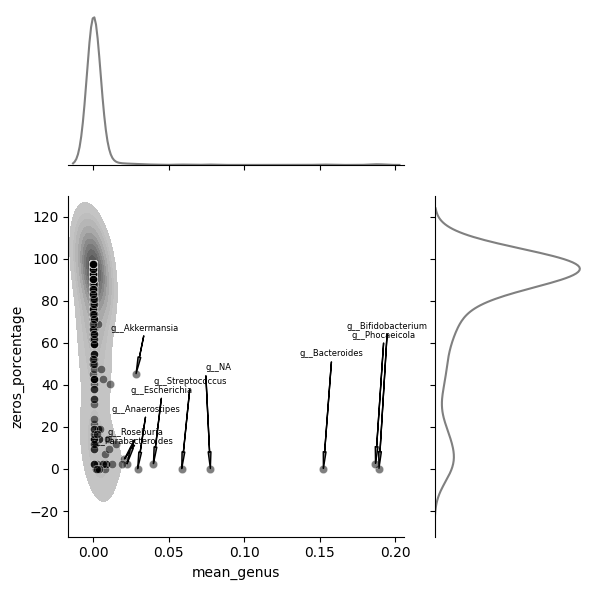

In [ ]:
# PROPIEDAD DE LA MATRIZ ORIGINAL
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# define your data points and labels
y = df['zeros_porcentage']
x = df['mean_genus']
label = df.index

# create joint plot with scatter plot and kernel density estimate
jp = sns.jointplot(x='mean_genus', y='zeros_porcentage', data=df, kind='kde', height=6, ratio=2, joint_kws={'shade': True, 'color': 'grey'}, marginal_kws={'color': 'grey'})
# overlay scatter plot on joint plot
jp.plot_joint(sns.scatterplot, color='black', alpha=0.5)

# get indices of the three largest values of x
idx = sorted(range(len(x)), key=lambda i: x[i])[-10:]

# add labels to the data points with the largest x values
f = 1
for i in idx:
    f = f+10
    jp.ax_joint.annotate(label[i], (x[i], y[i]), xytext=(6,f), textcoords='offset points', ha='center', fontsize=6,
                         arrowprops=dict(facecolor='grey', shrink=0.005, width=0.001, headwidth=2))
plt.savefig('original1.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


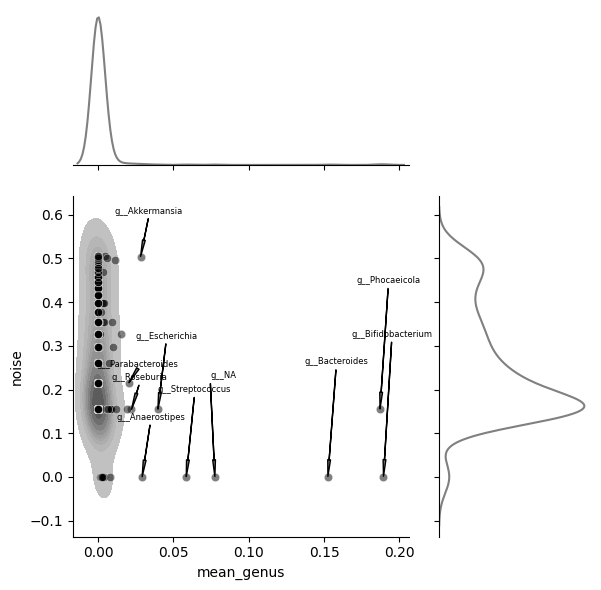

In [ ]:
# PROPIEDAD DE LA MATRIZ ORIGINAL
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# define your data points and labels
y = df['noise']
x = df['mean_genus']
label = df.index

# create joint plot with scatter plot and kernel density estimate
jp = sns.jointplot(x='mean_genus', y='noise', data=df, kind='kde', height=6, ratio=2, joint_kws={'shade': True, 'color': 'grey'}, marginal_kws={'color': 'grey'})
# overlay scatter plot on joint plot
jp.plot_joint(sns.scatterplot, color='black', alpha=0.5)

# get indices of the three largest values of x
idx = sorted(range(len(x)), key=lambda i: x[i])[-10:]

# add labels to the data points with the largest x values
f = 1
for i in idx:
    f = f+10
    jp.ax_joint.annotate(label[i], (x[i], y[i]), xytext=(6,f), textcoords='offset points', ha='center', fontsize=6,
                         arrowprops=dict(facecolor='grey', shrink=0.005, width=0.001, headwidth=2))
plt.savefig('original2.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


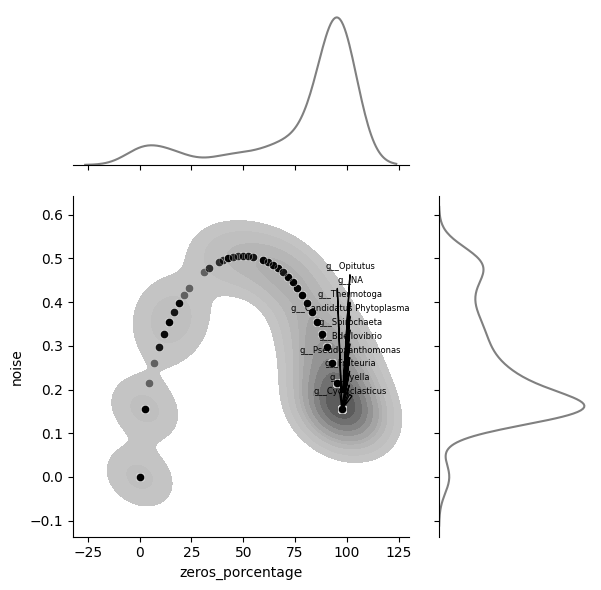

In [ ]:
# ESTO NO SE POR QUE SUCEDE. # PROPIEDAD DE LA MATRIZ ORIGINAL
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# define your data points and labels
y = df['noise']
x = df['zeros_porcentage']
label = df.index

# create joint plot with scatter plot and kernel density estimate
jp = sns.jointplot(x='zeros_porcentage', y='noise', data=df, kind='kde', height=6, ratio=2, joint_kws={'shade': True, 'color': 'grey'}, marginal_kws={'color': 'grey'})
# overlay scatter plot on joint plot
jp.plot_joint(sns.scatterplot, color='black', alpha=0.5)

# get indices of the three largest values of x
idx = sorted(range(len(x)), key=lambda i: x[i])[-10:]

# add labels to the data points with the largest x values
f = 1
for i in idx:
    f = f+10
    jp.ax_joint.annotate(label[i], (x[i], y[i]), xytext=(6,f), textcoords='offset points', ha='center', fontsize=6,
                         arrowprops=dict(facecolor='grey', shrink=0.005, width=0.001, headwidth=2))
plt.savefig('original3.png')
plt.show()

In [ ]:
# PROPIEDAD DE LA MATRIZ QUE SE INDUCEN CEROS A LA ORIGINAL
df = pd.DataFrame()
df['mean_genus'] =matrix_dropouted.mean()
df['zeros_porcentage']=matrix_dropouted.replace(0,np.nan).isna().mean() * 100
df['noise']=matrix_dropouted.replace(0,np.nan).isna().std()

In [ ]:
df.head()

,mean_genus,zeros_porcentage,noise
g__Acidobacterium,0.000000,100.000000,0.000000
g__Candidatus Koribacter,0.000000,100.000000,0.000000
g__Acidimicrobium,0.000000,100.000000,0.000000
g__Actinomyces,0.000011,83.333333,0.377195
g__Actinotignum,0.000000,100.000000,0.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


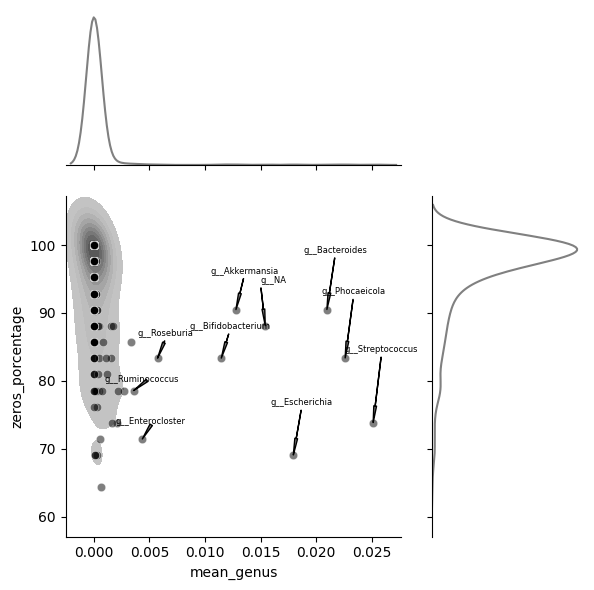

In [ ]:
# PROPIEDAD DE LA MATRIZ QUE SE INDUCEN CEROS A LA ORIGINAL
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# define your data points and labels
y = df['zeros_porcentage']
x = df['mean_genus']
label = df.index

# create joint plot with scatter plot and kernel density estimate
jp = sns.jointplot(x='mean_genus', y='zeros_porcentage', data=df, kind='kde', height=6, ratio=2, joint_kws={'shade': True, 'color': 'grey'}, marginal_kws={'color': 'grey'})
# overlay scatter plot on joint plot
jp.plot_joint(sns.scatterplot, color='black', alpha=0.5)

# get indices of the three largest values of x
idx = sorted(range(len(x)), key=lambda i: x[i])[-10:]

# add labels to the data points with the largest x values
f = 1
for i in idx:
    f = f+5
    jp.ax_joint.annotate(label[i], (x[i], y[i]), xytext=(6,f), textcoords='offset points', ha='center', fontsize=6,
                         arrowprops=dict(facecolor='grey', shrink=0.005, width=0.001, headwidth=2))
plt.savefig('originalzeros1.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


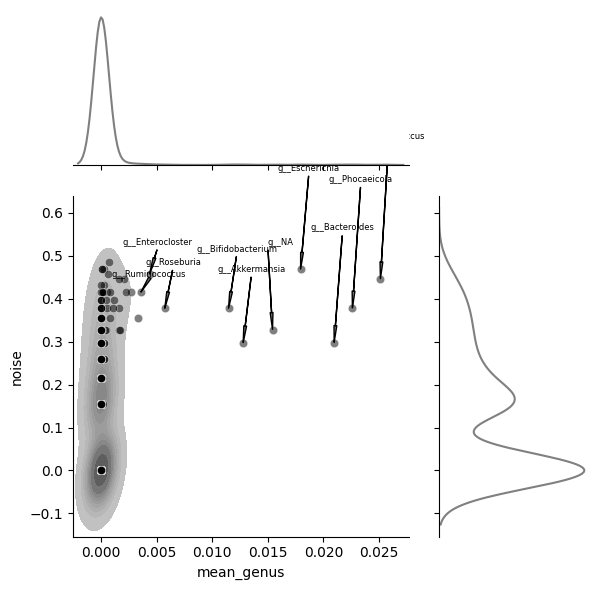

In [ ]:
# PROPIEDAD DE LA MATRIZ QUE SE INDUCEN CEROS A LA ORIGINAL
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# define your data points and labels
y = df['noise']
x = df['mean_genus']
label = df.index

# create joint plot with scatter plot and kernel density estimate
jp = sns.jointplot(x='mean_genus', y='noise', data=df, kind='kde', height=6, ratio=2, joint_kws={'shade': True, 'color': 'grey'}, marginal_kws={'color': 'grey'})
# overlay scatter plot on joint plot
jp.plot_joint(sns.scatterplot, color='black', alpha=0.5)

# get indices of the three largest values of x
idx = sorted(range(len(x)), key=lambda i: x[i])[-10:]

# add labels to the data points with the largest x values
f = 1
for i in idx:
    f = f+10
    jp.ax_joint.annotate(label[i], (x[i], y[i]), xytext=(6,f), textcoords='offset points', ha='center', fontsize=6,
                         arrowprops=dict(facecolor='grey', shrink=0.005, width=0.001, headwidth=2))
plt.savefig('originalzeros2.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


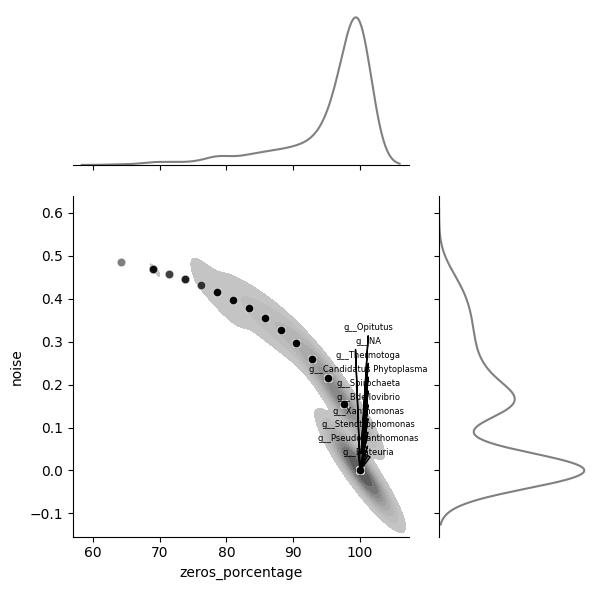

In [ ]:
# ESTO NO SE POR QUE SUCEDE. # # PROPIEDAD DE LA MATRIZ QUE SE INDUCEN CEROS A LA ORIGINAL
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# define your data points and labels
y = df['noise']
x = df['zeros_porcentage']
label = df.index

# create joint plot with scatter plot and kernel density estimate
jp = sns.jointplot(x='zeros_porcentage', y='noise', data=df, kind='kde', height=6, ratio=2, joint_kws={'shade': True, 'color': 'grey'}, marginal_kws={'color': 'grey'})
# overlay scatter plot on joint plot
jp.plot_joint(sns.scatterplot, color='black', alpha=0.5)

# get indices of the three largest values of x
idx = sorted(range(len(x)), key=lambda i: x[i])[-10:]

# add labels to the data points with the largest x values
f = 1
for i in idx:
    f = f+10
    jp.ax_joint.annotate(label[i], (x[i], y[i]), xytext=(6,f), textcoords='offset points', ha='center', fontsize=6,
                         arrowprops=dict(facecolor='grey', shrink=0.005, width=0.001, headwidth=2))

plt.savefig('originalzeros3.png')
plt.show()

In [ ]:
# ESTE ES EL ANALISIS CON LA MATRIZ DE CONTEOS IMPUTADA y con filtro.
df = pd.DataFrame()
df['mean_genus'] =imputed_ALL_filter.mean()
df['zeros_porcentage']=imputed_ALL_filter.replace(0,np.nan).isna().mean() * 100
df['noise']=imputed_ALL_filter.replace(0,np.nan).isna().std()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


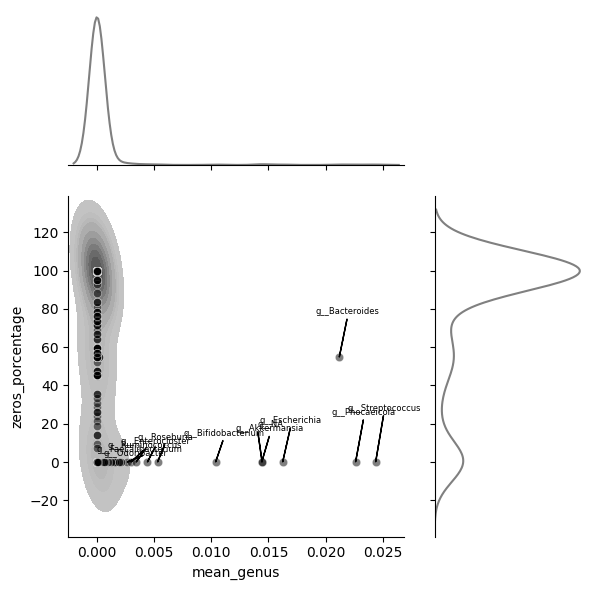

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# define your data points and labels
y = df['zeros_porcentage']
x = df['mean_genus']
label = df.index

# create joint plot with scatter plot and kernel density estimate
jp = sns.jointplot(x='mean_genus', y='zeros_porcentage', data=df, kind='kde', height=6, ratio=2, joint_kws={'shade': True, 'color': 'grey'}, marginal_kws={'color': 'grey'})
# overlay scatter plot on joint plot
jp.plot_joint(sns.scatterplot, color='black', alpha=0.5)

# get indices of the three largest values of x
idx = sorted(range(len(x)), key=lambda i: x[i])[-12:]

# add labels to the data points with the largest x values
f = 1
for i in idx:
    f = f+3
    jp.ax_joint.annotate(label[i], (x[i], y[i]), xytext=(6,f), textcoords='offset points', ha='center', fontsize=6,
                         arrowprops=dict(facecolor='grey', shrink=0.005, width=0.00001, headwidth=0.1))
plt.savefig('imputed1.png')
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


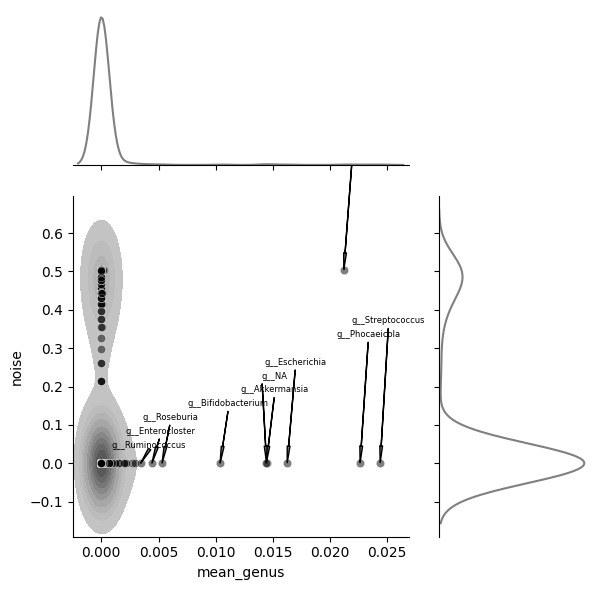

In [ ]:
# PROPIEDAD DE LA MATRIZ QUE SE INDUCEN CEROS A LA ORIGINAL
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# define your data points and labels
y = df['noise']
x = df['mean_genus']
label = df.index

# create joint plot with scatter plot and kernel density estimate
jp = sns.jointplot(x='mean_genus', y='noise', data=df, kind='kde', height=6, ratio=2, joint_kws={'shade': True, 'color': 'grey'}, marginal_kws={'color': 'grey'})
# overlay scatter plot on joint plot
jp.plot_joint(sns.scatterplot, color='black', alpha=0.5)

# get indices of the three largest values of x
idx = sorted(range(len(x)), key=lambda i: x[i])[-10:]

# add labels to the data points with the largest x values
f = 1
for i in idx:
    f = f+10
    jp.ax_joint.annotate(label[i], (x[i], y[i]), xytext=(6,f), textcoords='offset points', ha='center', fontsize=6,
                         arrowprops=dict(facecolor='grey', shrink=0.005, width=0.001, headwidth=2))
plt.savefig('imputed2.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


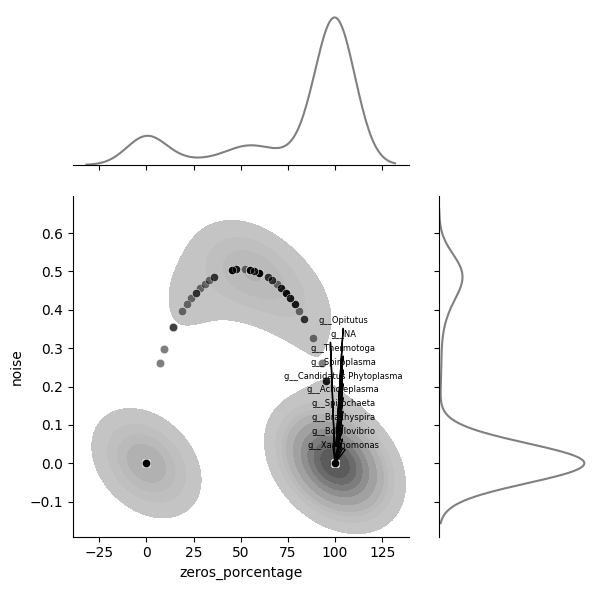

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# define your data points and labels
y = df['noise']
x = df['zeros_porcentage']
label = df.index

# create joint plot with scatter plot and kernel density estimate
jp = sns.jointplot(x='zeros_porcentage', y='noise', data=df, kind='kde', height=6, ratio=2, joint_kws={'shade': True, 'color': 'grey'}, marginal_kws={'color': 'grey'})
# overlay scatter plot on joint plot
jp.plot_joint(sns.scatterplot, color='black', alpha=0.5)

# get indices of the three largest values of x
idx = sorted(range(len(x)), key=lambda i: x[i])[-10:]

# add labels to the data points with the largest x values
f = 1
for i in idx:
    f = f+10
    jp.ax_joint.annotate(label[i], (x[i], y[i]), xytext=(6,f), textcoords='offset points', ha='center', fontsize=6,
                         arrowprops=dict(facecolor='grey', shrink=0.005, width=0.001, headwidth=2))
plt.savefig('imputed3.png')
plt.show()

**BUSQUEMOS EVALUAR LA RECUPERACION DE LOS CEROS IMPUTADOS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# COMPARACION ENTRE LOS VALORES CON CEROS REALES Y LA MATRIZ CON CEROS AGREGADOS
table_shotgun_ok_T_F = table_shotgun_ok == 0 #los que son 0 serán True los demás será False
table_shotgun_ok_T_F= table_shotgun_ok_T_F.replace({True:1,False:0})
#table_shotgun_ok_T_F.values.flatten()

In [ ]:
matrix_dropouted_ok_T_F = matrix_dropouted == 0    #los que son 0 serán True los demás será False
matrix_dropouted_ok_T_F = matrix_dropouted_ok_T_F.replace({True:1,False:0})
#matrix_dropouted_ok_T_F.values.flatten()

In [ ]:
true_labels = table_shotgun_ok_T_F.values.flatten()
pred_labels = matrix_dropouted_ok_T_F.values.flatten()

In [ ]:
# fair agreement
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(true_labels , pred_labels)


0.2822826113143828

In [ ]:
import collections
collections.Counter(true_labels)

Counter({0: 4041, 1: 15027})

In [ ]:
import collections
collections.Counter(pred_labels)

Counter({1: 18261, 0: 807})

In [ ]:
# Create confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
cm

array([[  807,  3234],
       [    0, 15027]])

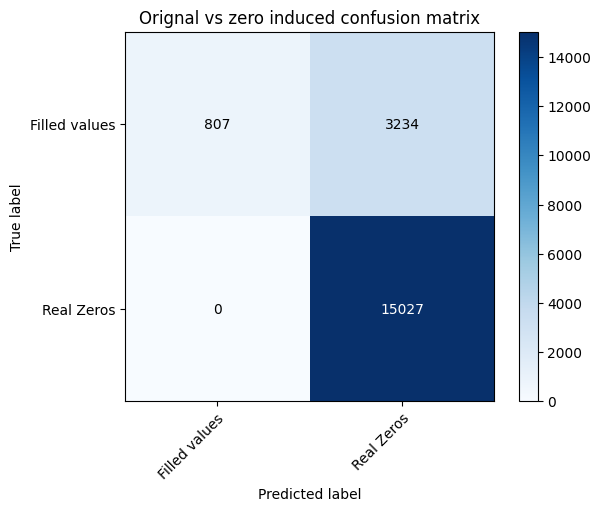

In [ ]:
# Define class labels
class_names = ['Filled values', 'Real Zeros']
# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Show all ticks and label them with the respective list entries
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Set title
ax.set_title("Orignal vs zero induced confusion matrix")

# Add gridlines
ax.grid(False)

# Show plot
plt.show()


**Comparacion entre la matriz real y la imputada**

In [ ]:
imputed_ALL_T_F = imputed_ALL == 0
imputed_ALL_T_F= imputed_ALL_T_F.replace(True,1)
imputed_ALL_T_F=imputed_ALL_T_F.replace(False,0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define true labels and predicted labels
true_labels = table_shotgun_ok_T_F.values.flatten()
pred_labels = imputed_ALL_T_F.values.flatten()

In [ ]:
cm = confusion_matrix(true_labels, pred_labels)
cm

array([[ 2766,  1275],
       [ 1262, 13765]])

In [ ]:
# Moderate agreement
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(true_labels , pred_labels)

0.6012088695543272

In [ ]:
import collections
collections.Counter(true_labels)

Counter({0: 4041, 1: 15027})

In [ ]:
import collections
collections.Counter(pred_labels)

Counter({1: 15040, 0: 4028})

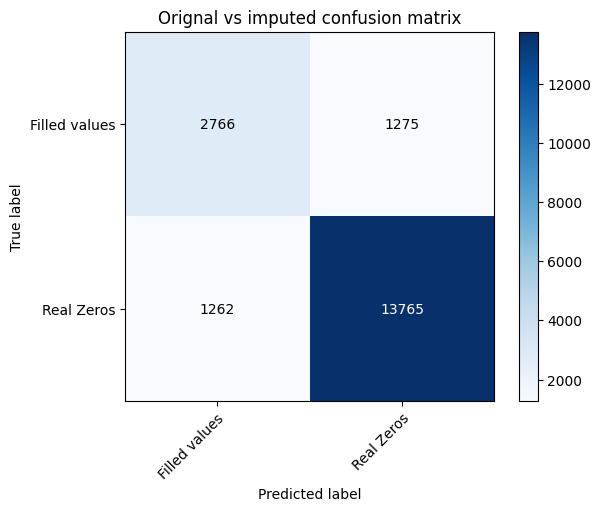

In [ ]:
# Create confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Define class labels
class_names = ['Filled values', 'Real Zeros']
# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Show all ticks and label them with the respective list entries
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Set title
ax.set_title("Orignal vs imputed confusion matrix")

# Add gridlines
ax.grid(False)


# Show plot
plt.show()


In [ ]:
# https://www.statology.org/cohens-kappa-python/
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(true_labels , pred_labels)

0.6012088695543272

In [ ]:
(table_shotgun_ok== 0).sum().sum()

15027

In [ ]:
table_shotgun_ok.shape[0] * table_shotgun_ok.shape[1]

19068

In [ ]:
# Percentage of zeros
def percent_zeros (a):
  percent = (a== 0).sum().sum()*100/ (a.shape[0] * a.shape[1])
  return percent


In [ ]:
percent_zeros (table_shotgun_ok)

78.80742605412209

# Evaluar de acuerdo a la divergencia y comparación entre las distribuciones

In [ ]:
table_shotgun_ok.head()


,g__Acidobacterium,g__Candidatus Koribacter,g__Acidimicrobium,g__Actinomyces,g__Actinotignum,g__Mobiluncus,g__Schaalia,g__Trueperella,g__Actinopolyspora,g__Bifidobacterium,...,g__Acholeplasma,g__Candidatus Phytoplasma,g__Entomoplasma,g__Mesoplasma,g__Spiroplasma,g__Mycoplasma,g__Thermotoga,g__NA,g__Opitutus,g__Akkermansia
index,,,,,,,,,,,,,,,,,,,,,
SM030818.1,0.000002,0.0,0.0,0.000036,0.0,1.190000e-55,0.0,0.0,0.0,0.133664,...,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.000000
SM030818.24,0.000000,0.0,0.0,0.000097,0.0,0.000000e+00,0.0,0.0,0.0,0.028811,...,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.000000
SM030818.33,0.000000,0.0,0.0,0.000000,0.0,3.179999e-06,0.0,0.0,0.0,0.000460,...,0.000000e+00,0.0,0.0,0.000007,0.0,3.879999e-28,0.0,0.0,0.0,0.001678
SM030818.92,0.000000,0.0,0.0,0.000029,0.0,0.000000e+00,0.0,0.0,0.0,0.062603,...,3.129999e-46,0.0,0.0,0.000000,0.0,4.619999e-05,0.0,0.0,0.0,0.000000
SM030818.97,0.000000,0.0,0.0,0.000135,0.0,4.850001e-70,0.0,0.0,0.0,0.264674,...,0.000000e+00,0.0,0.0,0.000000,0.0,2.420000e-154,0.0,0.0,0.0,0.000000


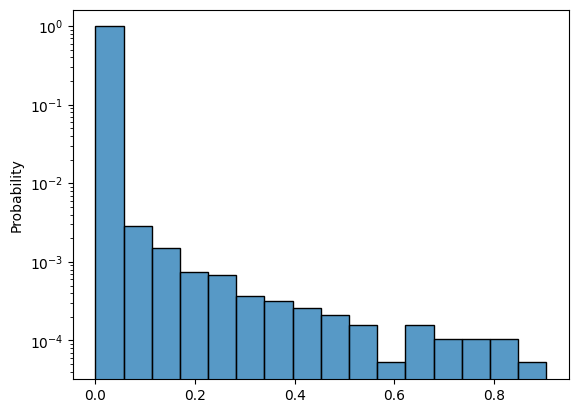

In [ ]:
#### original data
data = table_shotgun_ok
#print(data)
flatten_data = data.to_numpy().flatten()
#print(max(flatten_data))
#print(min(flatten_data))

bins = np.histogram_bin_edges(flatten_data, bins='auto')
#print(bins)
hst = sns.histplot(data=flatten_data, bins=bins, stat="probability");
#hst.set_xscale("log")
hst.set_yscale("log")

Heigth_ok = [h.get_height() for h in hst.patches]
width = [h.get_x() for h in hst.patches]
#deltw = [h.get_width() for h in hst.patches]

#for w,h in zip(width,Heigth_ok):
#  print(w,h)

#density_curve = sns.kdeplot(Heigth_ok, linewidth=3)

In [ ]:
def sc_PHENIX_R(data, umap_data,t=10,decay=15,metric='cosine',knn=10):



    print('calculando distancias eucle')

    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix

    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))

    knn_dst = np.sort(distance_matrix, axis=1)


    epsilon = knn_dst[:,knn]


    pdx_scale = (distance_matrix / epsilon).T

    E = np.exp(-1 * ( pdx_scale ** decay))

    print(' afinity matrix done')

    A = (E + E.T)

    diff_deg = np.diag(np.sum(A,0))


    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)


    new_matrix =  np.linalg.matrix_power(diff_op, t)


    data_new = np.array(np.dot(new_matrix,data))



    rescale_percent =99.99
    M99 = np.percentile(data, rescale_percent, axis=0)
    M100 = data.max(axis=0)
    indices = np.where(M99 == 0)[0]
    M99[indices] = M100[indices]



    M99_new = np.percentile(data_new, rescale_percent, axis=0)
    M100_new = data_new.max(axis=0)
    indices = np.where(M99_new == 0)[0]
    M99_new[indices] = M100_new[indices]


    max_ratio = np.divide(M99, M99_new)
    data_new = np.multiply(data_new, np.tile(max_ratio, (len(data), 1)))



    print('reescalate')


    print('imputation')

    Matix_col_genes_row_cell2 = (data +1) - data

    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2

    Matix_impu = Matix_col_genes_row_cell2 + data_new


    Matix_impu = Matix_impu

    print('done')
    end= time.ctime()
    print('done',end)


    return (Matix_impu)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# calculate the kl divergence
def kl_divergence(p, q):
    return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))

# calculate the js divergence
def js_divergence(p, q):
  m = 0.5 * (p + q)
  return (0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m))

def histo(matrix_dropouted,bins):
  flatten_data_dropouted = matrix_dropouted.to_numpy().flatten()
  hst_dropouted = sns.histplot(data=flatten_data_dropouted, bins=bins, stat = "probability");
  return({h.get_height() for h in hst_dropouted.patches})

r=[]
I = []
for i in range(100):

  i=i/100
#  print(i)
  matrix_dropouted = matrix_dropout(table_shotgun_ok, por_drop = i,seed=3)
#  print(calcular_tasa_ceros(matrix_dropouted))
  flatten_data_dropouted = matrix_dropouted.to_numpy().flatten()
  hst_dropouted = sns.histplot(data=flatten_data_dropouted, bins=bins, stat = "probability");
  Heigth_dropouted = [h.get_height() for h in hst_dropouted.patches]
  #  width = [h.get_x() for h in hst_dropouted.patches]
  #deltw = [h.get_width() for h in hst.patches]
  plt.clf()

  r.append(kl_divergence(np.array(Heigth_dropouted), np.array(Heigth_ok)))

  ## Imputation
  umap_op = umap.UMAP(n_components=10, verbose=True,metric='euclidean',n_epochs=500,min_dist=0.1, n_neighbors=30,random_state=7,target_weight=0.5)
  data_umap_vis_super = umap_op.fit_transform(matrix_dropouted,labels['SampleType'].replace( {'Healthy': 0, 'UC':1}))
  # regresar t a 2, unicamente utilizar 1 si con los datos artificiales
  imputed_ALL =sc_PHENIX_R(matrix_dropouted, data_umap_vis_super, t=2,decay=600,metric='euclidean',knn=3)

  flatten_data_imputed = imputed_ALL.to_numpy().flatten()
  hst_imputed = sns.histplot(data=flatten_data_imputed, bins=bins, stat = "probability");
  Heigth_imputed = [h.get_height() for h in hst_imputed.patches]
  plt.clf()

  I.append(kl_divergence(np.array(Heigth_imputed), np.array(Heigth_ok)))



Thu Jun 15 18:16:27 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:27 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:27 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:27 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:27 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:27 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:28 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:28 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:28 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:28 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:28 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:28 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:28 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:28 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:29 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:29 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:29 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:29 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:29 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:29 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:30 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:30 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:30 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:30 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:30 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:30 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:30 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:30 2023 Finding Nearest Neighbors

<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))



Thu Jun 15 18:16:30 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:30 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:31 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:31 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:31 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:31 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:31 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:31 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:33 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:33 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:33 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:33 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:33 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:33 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:34 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:34 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:34 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:34 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:34 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:34 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:35 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:35 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:35 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:35 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:35 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:35 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:36 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:36 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:36 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:36 2023

<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


 Finding Nearest Neighbors
Thu Jun 15 18:16:36 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:36 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:37 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:37 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:37 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:37 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:37 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:37 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:37 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:37 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:38 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:38 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:38 2023 Finished Nearest Neighbor Search


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Thu Jun 15 18:16:38 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:38 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:38 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:39 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:39 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:39 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:39 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:40 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:40 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:40 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:40 2023 Finding Nearest Neighbors


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Thu Jun 15 18:16:40 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:40 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:41 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:41 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:41 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:41 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:41 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:41 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:42 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:42 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:42 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:42 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:42 2023 Finished Nearest Neighbor Search


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Thu Jun 15 18:16:42 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:43 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:43 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:43 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:43 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:43 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:43 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:44 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:44 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:44 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:44 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:44 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:44 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:45 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:45 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:45 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:45 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:45 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:45 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:46 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:46 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Thu Jun 15 18:16:47 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:47 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:47 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:47 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:47 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:47 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:48 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:48 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:48 2023 Finished Nearest Neighbor Search


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Thu Jun 15 18:16:48 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:48 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:48 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Thu Jun 15 18:16:48 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:48 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:48 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:48 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:49 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:49 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:49 2023 Construct fuzzy simplicial set


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Thu Jun 15 18:16:49 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:49 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:49 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:50 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:50 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:50 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:50 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:50 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:50 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:51 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:51 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:51 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:51 2023 Finding Nearest Neighbors


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Thu Jun 15 18:16:51 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:51 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:52 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:52 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:53 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:53 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:53 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:53 2023 Construct embedding


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:53 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:53 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:54 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:54 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:54 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:54 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:54 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:54 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:54 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:54 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:54 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:55 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:55 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:55 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:56 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:56 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:56 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:56 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:57 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:57 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:57 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:57 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:57 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:16:57 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:58 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:58 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:16:58 2023 Construct fuzzy simplicial set
Thu Jun 15 18:16:58 2023 Finding Nearest Neighbors
Thu Jun 15 18:16:58 2023 Finished Nearest Neighbor Search


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Thu Jun 15 18:16:58 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:16:59 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:16:59 2023
UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:17:00 2023 Construct fuzzy simplicial set
Thu Jun 15 18:17:00 2023 Finding Nearest Neighbors
Thu Jun 15 18:17:00 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:17:00 2023 Construct embedding


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:17:00 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:17:00 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:17:00 2023 Construct fuzzy simplicial set
Thu Jun 15 18:17:00 2023 Finding Nearest Neighbors
Thu Jun 15 18:17:00 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:17:00 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:17:01 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:17:01 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=7, verbose=True)
Thu Jun 15 18:17:01 2023 Construct fuzzy simplicial set
Thu Jun 15 18:17:01 2023 Finding Nearest Neighbors
Thu Jun 15 18:17:01 2023 Finished Nearest Neighbor Search
Thu Jun 15 18:17:01 2023 Construct embedding


<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 15 18:17:02 2023 Finished embedding
calculando distancias eucle
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
reescalate
imputation
done
done Thu Jun 15 18:17:02 2023


<ipython-input-67-4c70a97c01ab>:31: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * ( pdx_scale ** decay))
<ipython-input-67-4c70a97c01ab>:64: RuntimeWarning: invalid value encountered in true_divide
  max_ratio = np.divide(M99, M99_new)
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))
<ipython-input-70-b2274c64ab5b>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0.0, p * np.log(p / q), 0))


<Figure size 640x480 with 0 Axes>

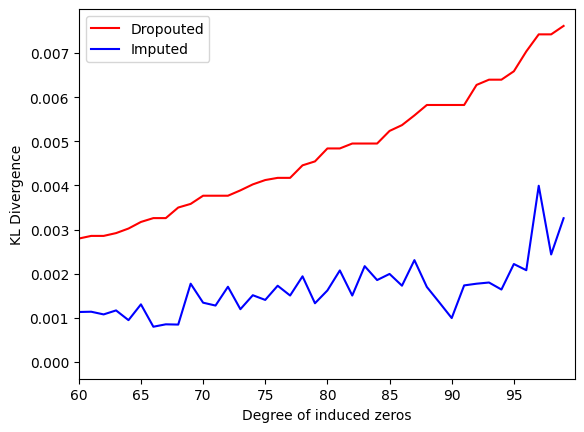

In [ ]:
plt.plot (np.linspace(0,99,100),r, label = 'Dropouted', color = 'red')
plt.plot (np.linspace(0,99,100),I, label = 'Imputed', color = 'blue')

plt.ylabel('KL Divergence')
plt.xlabel('Degree of induced zeros')
plt.legend()
# Rango específico del eje x (por ejemplo, de 20 a 50)
plt.xlim(60, 99.9)

plt.show()